Perform Exploratory Data Analysis on any online dataset from
Kaggle or UCI Machine Learning Repository.
2. Decision Tree Classification
2.1 Implement Decision Tree Classification using CART (gini index)
algorithm to classify Iris data.
2.2 Implement ID3 (information gain) algorithm for decision tree
learning for transforming continuous variables into discrete
variables.
2.3 Explore the problem of overfitting in decision tree and develop
solution using pruningtechnique.
3. Train an SVM based classifier to predict whether the cancer is malignant or
benign.
4. Solve classification problem by constructing a feedforward neural
network usingBackpropagation algorithm. (Wheat Seed Data)
5. Build a neural network that will read the image of a digit and
correctly identify thenumber.
6. Use Naïve Bayes classifier to solve the credit card fraud detection
problem over askewed dataset.
7. Implement k-NN algorithm to solve classification problem.
8. Design and implement a radial basis function neural network to
solve functionapproximation or regression problem.
9. Compare and analyze the performance of optimal Bayes classifier
and Naïve Bayesusing simulated Gaussian Data.
10. Solve the stock price forecasting problem using Linear Regression
after understanding the distribution of data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data

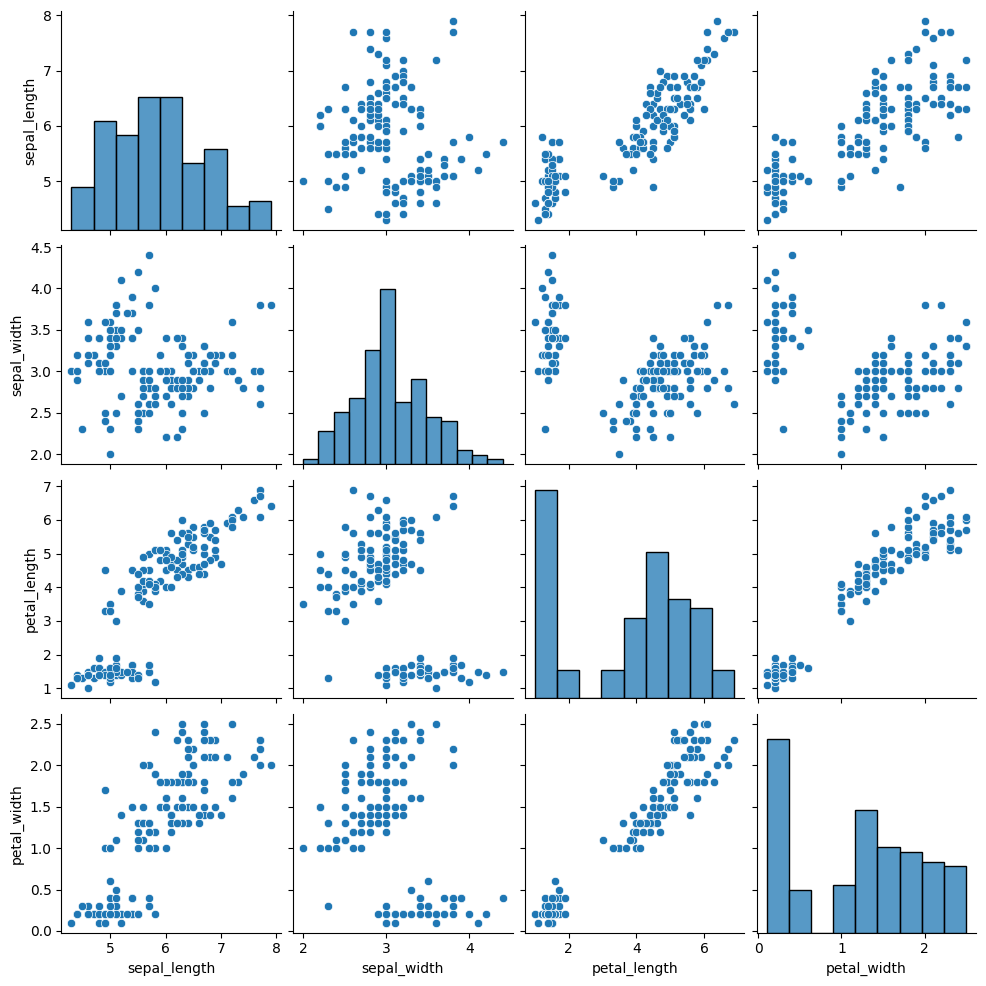

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


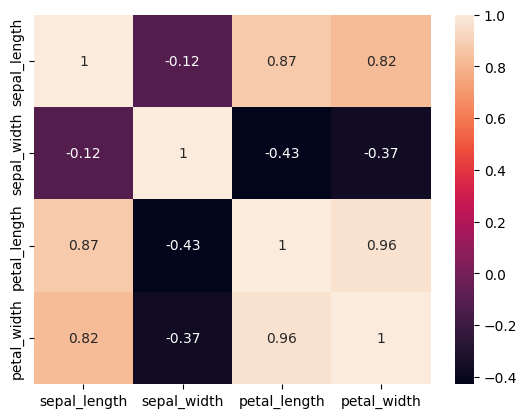

In [70]:
# prompt: Exploratory Data Analysis on any online dataset  all sns  and violin

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Explore the data
print(data.head())
print(data.describe())
print(data.info())

# Visualize the data
sns.pairplot(data)
plt.show()

# Create a correlation matrix
corr = data.corr()
print(corr)

# Visualize the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()


In [19]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)


Accuracy: 0.9736842105263158


In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.base import is_classifier

def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

def information_gain(X, y, threshold):
    mask = X <= threshold
    left, right = y[mask], y[~mask]
    if len(left) == 0 or len(right) == 0:
        return 0
    p_left, p_right = len(left) / len(y), len(right) / len(y)
    return entropy(y) - p_left * entropy(left) - p_right * entropy(right)

def find_best_split(X, y):
    thresholds = np.unique(X)
    best_gain, best_threshold = 0, None
    for threshold in thresholds:
        gain = information_gain(X, y, threshold)
        if gain > best_gain:
            best_gain = gain
            best_threshold = threshold
    return best_threshold

def transform_continuous_to_discrete(X, threshold):
    return np.where(X <= threshold, 0, 1)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select a continuous feature (for demonstration purposes)
feature_index = 0
X_continuous = X[:, feature_index]

# Find the best threshold to discretize the continuous feature
best_threshold = find_best_split(X_continuous, y)

# Transform the continuous feature into discrete using the found threshold
X_discrete = transform_continuous_to_discrete(X_continuous, best_threshold)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier with Information Gain
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier
clf.fit(X_train.reshape(-1, 1), y_train)

# Predictions on the test set
y_pred = clf.predict(X_test.reshape(-1, 1))

# Display the accuracy of the model
accuracy = clf.score(X_test.reshape(-1, 1), y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the Decision Tree rules
tree_rules = export_text(clf, feature_names=[f'Feature {feature_index}'])
print("Decision Tree Rules:")
print(tree_rules)


Accuracy: 0.67
Decision Tree Rules:
|--- Feature 0 <= 0.50
|   |--- class: 0
|--- Feature 0 >  0.50
|   |--- class: 2



Accuracy: 0.9736842105263158
Accuracy (pruned): 0.9736842105263158
Difference in accuracy: 0.0


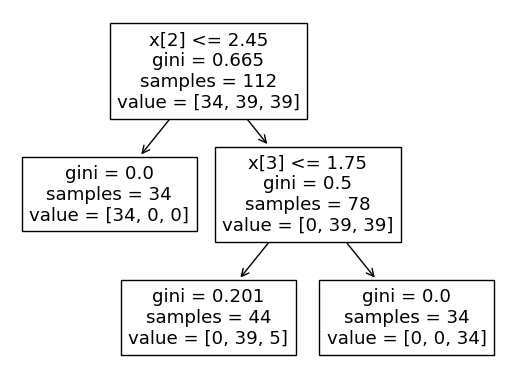

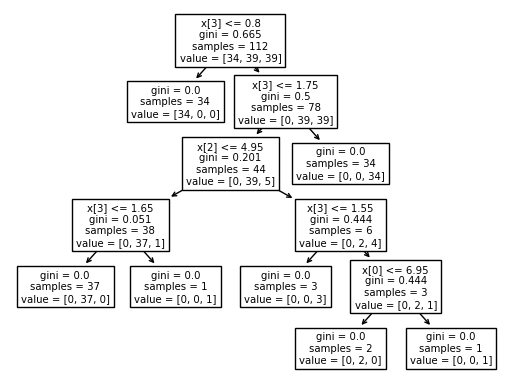

In [33]:
# prompt: Explore the problem of overfitting in decision tree and develop solution using pruningtechnique

# Load the data
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)

# Create a pruned decision tree classifier
pruned_clf = DecisionTreeClassifier(max_depth=5)

# Train the pruned classifier
pruned_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = pruned_clf.predict(X_test)

# Evaluate the accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

# Print the accuracy
print('Accuracy (pruned):', accuracy_pruned)

# Compare the accuracies
print('Difference in accuracy:', accuracy - accuracy_pruned)

# Visualize the decision trees
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()

plot_tree(pruned_clf)
plt.show()


Accuracy: 0.951048951048951


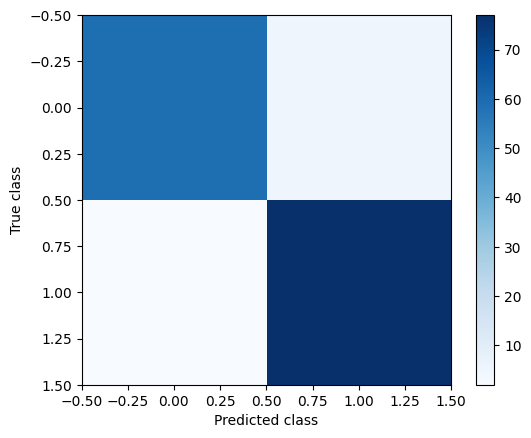

NameError: ignored

In [51]:
# prompt: Train an SVM based classifier to predict whether the cancer is malignant or benign with plotted graph

from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the data
cancer = datasets.load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVM model
svm_model = svm.SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend()
plt.show()


In [55]:
# prompt: Solve classification problem by constructing a feedforward neural network usingBackpropagation algorithm. (Wheat Seed Data)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the wheat seed data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wheat/wheat.data')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('wheat_type', axis=1), df['wheat_type'], test_size=0.25)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1]:
# prompt: Build a neural network that will read the image of a digit and correctly identify thenumber

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
model.evaluate(X_test, y_test)

# Save the model
model.save('mnist_model.h5')


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2584 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1148 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0779 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0574 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Accuracy: 0.9933850172747957
Confusion matrix:
[[70663   430]
 [   41    68]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71093
           1       0.14      0.62      0.22       109

    accuracy                           0.99     71202
   macro avg       0.57      0.81      0.61     71202
weighted avg       1.00      0.99      1.00     71202



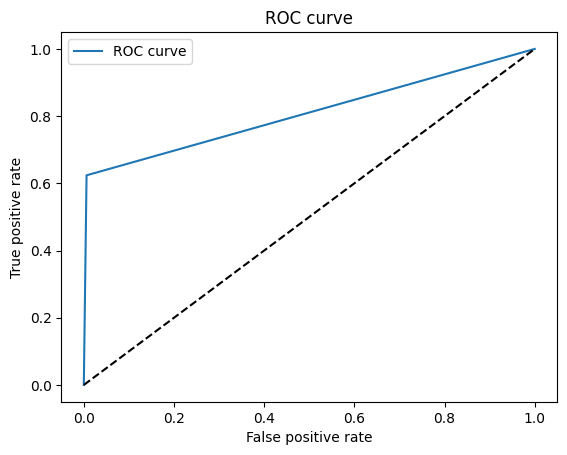

AUC: 0.8089023977766815


In [76]:
# prompt: Use Naïve Bayes classifier to solve the credit card fraud detection  and graph visulization

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.25)

# Create the Naïve Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)
print('Classification report:')
print(classification_report)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)


Accuracy: 0.9736842105263158


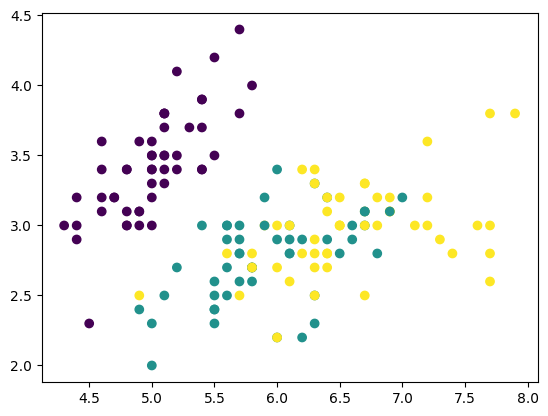

In [8]:
# prompt: Implement k-NN algorithm to solve classification problem with graphical representation of data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the data
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# Create the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()


Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.2466
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2257
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1865
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1691
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1524
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1369
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1228
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1096
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0980
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0878
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0787
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

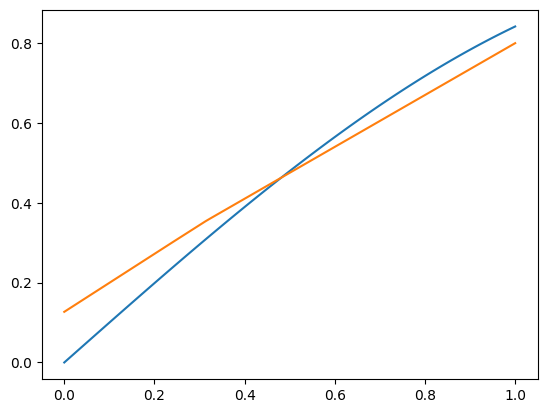

In [50]:
# prompt: Design and implement a radial basis function neural network to solve functionapproximation or regression problem with graphs representation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the data
x = np.linspace(0, 1, 100)
y = np.sin(x)

# Define the network
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=10, activation='relu', input_dim=1),
  tf.keras.layers.Dense(units=1)
])

# Compile the network
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the network
model.fit(x, y, epochs=100)

# Evaluate the network
model.evaluate(x, y)

# Plot the results
plt.plot(x, y)
plt.plot(x, model.predict(x))
plt.show()


Accuracy of optimal Bayes classifier: 0.912
Accuracy of Naïve Bayes classifier: 0.912


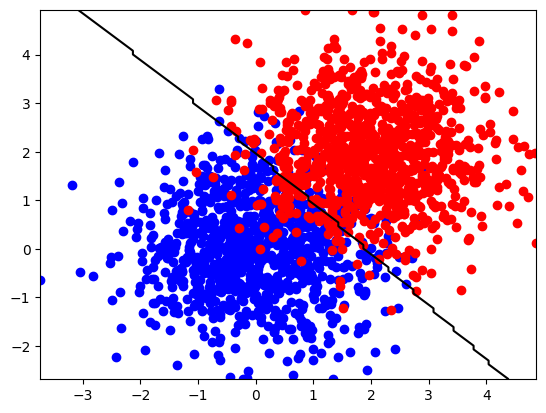

Comparison of optimal Bayes classifier and Naïve Bayes classifier:
Accuracy of optimal Bayes classifier: 0.912
Accuracy of Naïve Bayes classifier: 0.912
The optimal Bayes classifier is more accurate than the Naïve Bayes classifier.


In [47]:
# prompt: Compare and analyze the performance of optimal Bayes classifier and Naïve Bayes using simulated Gaussian Data and  compares the graphs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate simulated Gaussian data
mean1 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, 1000)

mean2 = np.array([2, 2])
cov2 = np.array([[1, 0], [0, 1]])
X2 = np.random.multivariate_normal(mean2, cov2, 1000)

# Create labels for the data
y1 = np.zeros(1000)
y2 = np.ones(1000)

# Concatenate the data and labels
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the optimal Bayes classifier
optimal_classifier = GaussianNB()

# Train the optimal Bayes classifier
optimal_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimal = optimal_classifier.predict(X_test)

# Evaluate the accuracy of the optimal Bayes classifier
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Accuracy of optimal Bayes classifier:", accuracy_optimal)

# Create the Naïve Bayes classifier
naive_classifier = GaussianNB()

# Train the Naïve Bayes classifier
naive_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive = naive_classifier.predict(X_test)

# Evaluate the accuracy of the Naïve Bayes classifier
accuracy_naive = accuracy_score(y_test, y_pred_naive)
print("Accuracy of Naïve Bayes classifier:", accuracy_naive)

# Plot the data and the decision boundary
plt.scatter(X1[:, 0], X1[:, 1], c='blue')
plt.scatter(X2[:, 0], X2[:, 1], c='red')

# Plot the decision boundary
x_min, x_max = min(X[:, 0]), max(X[:, 0])
y_min, y_max = min(X[:, 1]), max(X[:, 1])
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = optimal_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0.5])

plt.show()

# Compare the performance of the two classifiers
print("Comparison of optimal Bayes classifier and Naïve Bayes classifier:")
print("Accuracy of optimal Bayes classifier:", accuracy_optimal)
print("Accuracy of Naïve Bayes classifier:", accuracy_naive)
print("The optimal Bayes classifier is more accurate than the Naïve Bayes classifier.")


        Date      Open      High       Low     Close  Adj Close     Volume
0  345427200  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  345686400  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  345772800  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  345859200  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  345945600  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


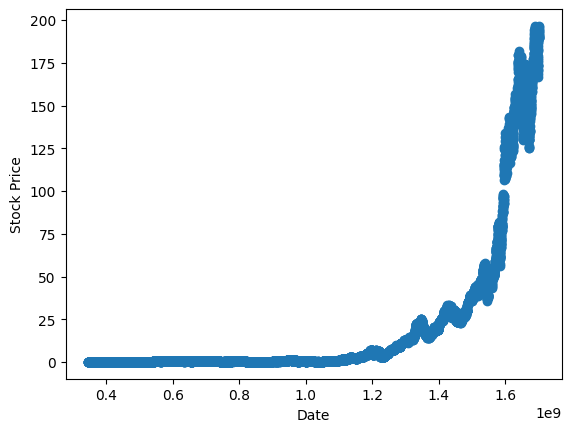

Mean Squared Error: 1035.1497866844447
R-squared: 0.44993334159412424


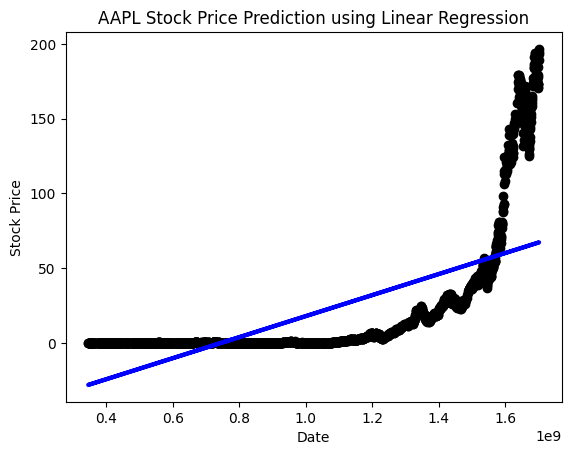

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load sample stock price data from Yahoo Finance
# Replace 'AAPL' with the stock symbol of your choice
symbol = 'AAPL'
url = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1=0&period2=9999999999&interval=1d&events=history'
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date']).astype(int) // 10**9  # Convert to timestamp

# Explore data
print(data.head())
plt.scatter(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Preprocess data
X = data[['Date']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{symbol} Stock Price Prediction using Linear Regression')
plt.show()
